# Creating Networks in Python with NetworkX

## Create and visualize simple graphs
Here we create a simple directed graph using the NetworkX library in Python. We then visualize the graph using the matplotlib library.

In [5]:
# Install the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [13]:
# Create a directed graph
g1 = nx.DiGraph()

# Add edges to the graph
edges1 = [(1, 2), (1, 3), (2, 4), (3, 1), (3, 5), (5, 1), (4, 3)]
g1.add_edges_from(edges1)

# Print a summary of the graph
print(f"Number of nodes: {len(g1.nodes)}")
print(f"Number of edges: {len(g1.edges)}")
print(f"Average degree: {sum(dict(g1.degree).values()) / len(g1.nodes)}")

Number of nodes: 5
Number of edges: 7
Average degree: 2.8


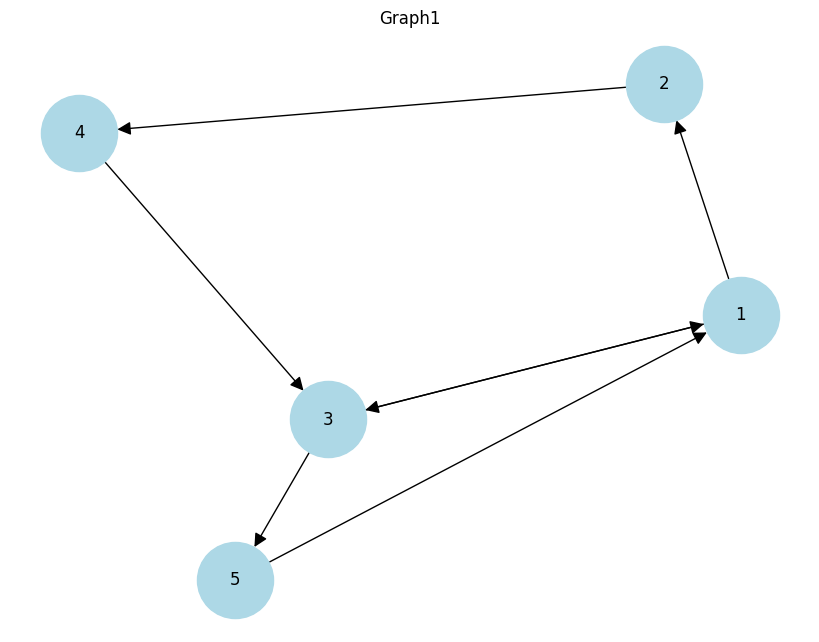

In [19]:
# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(g1, with_labels=True, node_color="lightblue", node_size=3000, arrowsize=20)
plt.title("Graph1")
plt.show()

Next, wew define another where we are giving more meaningful names, and, by specifying directed = FALSE, creating a directed network

In [15]:
# Create another undirected graph with meaningful names
g2 = nx.Graph()

# Add edges to the graph
edges2 = [
    ("Anand", "Beth"),
    ("Anand", "Chris"),
    ("Beth", "Dieter"),
    ("Chris", "Sun"),
    ("Chris", "Ali"),
    ("Beth", "Ali"),
    ("Ali", "Sun"),
    ("Sun", "Beth"),
    ("Fatima", "Chris"),
    ("Fatima", "Sun"),
]
g2.add_edges_from(edges2)

# Print a summary of the graph
print(f"Number of nodes: {len(g2.nodes)}")
print(f"Number of edges: {len(g2.edges)}")
print(f"Average degree: {sum(dict(g2.degree).values()) / len(g2.nodes)}")

Number of nodes: 7
Number of edges: 10
Average degree: 2.857142857142857


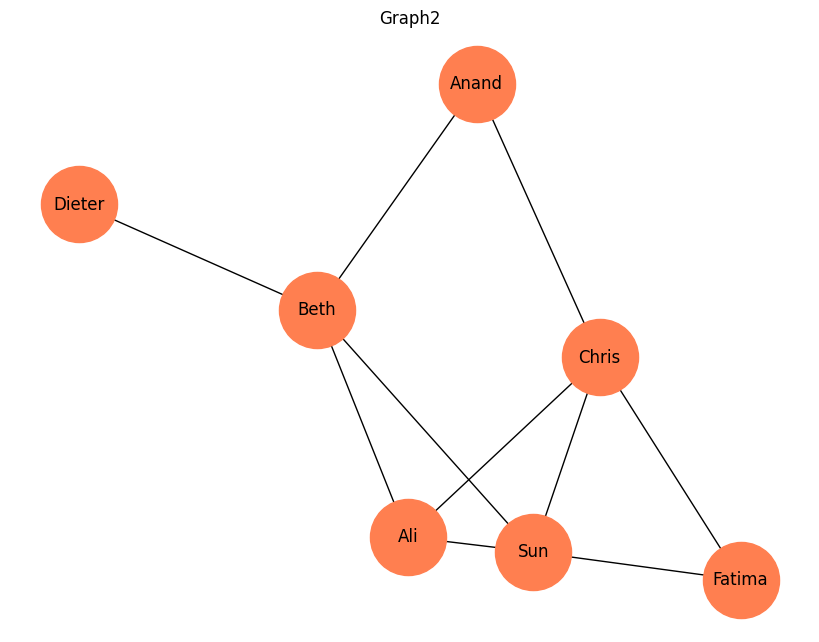

In [18]:
# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(g2, with_labels=True, node_color="coral", node_size=3000)
plt.title("Graph2")
plt.show()

## Adjacency Matrices
Recall that networks are graphs and can be represented as a matrix. This matrix may be referred to as a “sociomatrix” or an “adjacency matrix”.

In [20]:
# Create adjacency matrix of g1 and g2
adj1 = nx.adjacency_matrix(g1).todense()
adj2 = nx.adjacency_matrix(g2).todense()

print(f"Adjacency matrix of g1: \n{adj1}")
print(f"Adjacency matrix of g2: \n{adj2}")

Adjacency matrix of g1: 
[[0 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]]
Adjacency matrix of g2: 
[[0 1 1 0 0 0 0]
 [1 0 0 1 1 1 0]
 [1 0 0 0 1 1 1]
 [0 1 0 0 0 0 0]
 [0 1 1 0 0 1 1]
 [0 1 1 0 1 0 0]
 [0 0 1 0 1 0 0]]
